In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

y_pred_linear = svm_linear.predict(X_test)

print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))

Linear SVM Accuracy: 0.956140350877193


In [6]:
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

y_pred_rbf = svm_rbf.predict(X_test)

print("RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))

RBF SVM Accuracy: 0.9824561403508771


In [7]:
svm_tuned = SVC(kernel='rbf', C=10, gamma=0.01)
svm_tuned.fit(X_train, y_train)

print("Tuned SVM Accuracy:", accuracy_score(y_test, svm_tuned.predict(X_test)))

Tuned SVM Accuracy: 0.9824561403508771


In [8]:
cv_scores = cross_val_score(svm_rbf, X, y, cv=5)

print("Cross Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross Validation Scores: [0.85087719 0.89473684 0.92982456 0.94736842 0.9380531 ]
Mean CV Score: 0.9121720229777983


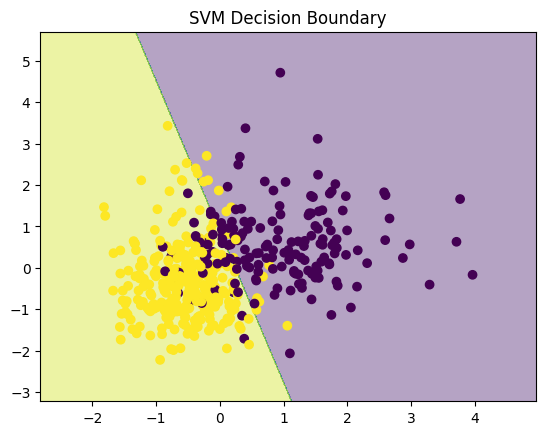

In [9]:
X_small = X[:, :2]

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_small, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train_s)
X_test_s = scaler.transform(X_test_s)

model = SVC(kernel='linear')
model.fit(X_train_s, y_train_s)

# Create meshgrid
x_min, x_max = X_train_s[:, 0].min() - 1, X_train_s[:, 0].max() + 1
y_min, y_max = X_train_s[:, 1].min() - 1, X_train_s[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train_s[:, 0], X_train_s[:, 1], c=y_train_s)
plt.title("SVM Decision Boundary")
plt.show()

**CONCLUSION**

SVM effectively classifies data by maximizing margin between classes. The RBF kernel handles non-linear data better than linear kernel. Hyperparameter tuning improves performance.